In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, cos, sin, sqrt, lambdify, simplify, Q, refine, nsolve, solve, pi,cosh, sinh, acosh, limit, log, nroots, Eq

In [2]:
x,y, tau = symbols('x y tau', real=True)
e, E, epsilon = symbols('e E epsilon', positive=True)
dEdt = 1/(1-e*cos(E))        # Solar System Dynamics Eq. 2.50

In [3]:
from names import *

In [4]:
# Eccentric orbits
dxs = [cos(E)-e]             # Solar System Dynamics Eq. 2.41
dys = [sqrt(1-e*e)*sin(E)]
for i in range(9):
    dxs.append(diff(dxs[-1],E) * dEdt)
    dys.append(diff(dys[-1],E) * dEdt)    
dxs = lambdify((e,E),dxs)
dys = lambdify((e,E),dys)

# Hyperbolic Orbits
# Note: E is hyperbolic anomaly here
dxsh = [e-cosh(E)]
dysh = [sqrt(e*e-1)*sinh(E)]
dEdth = 1/(e*cosh(E)-1)
for i in range(9):
    dxsh.append(diff(dxsh[-1],E) * dEdth)
    dysh.append(diff(dysh[-1],E) * dEdth)    
dxsh = lambdify((e,E),dxsh)
dysh = lambdify((e,E),dysh)

# Derivatives

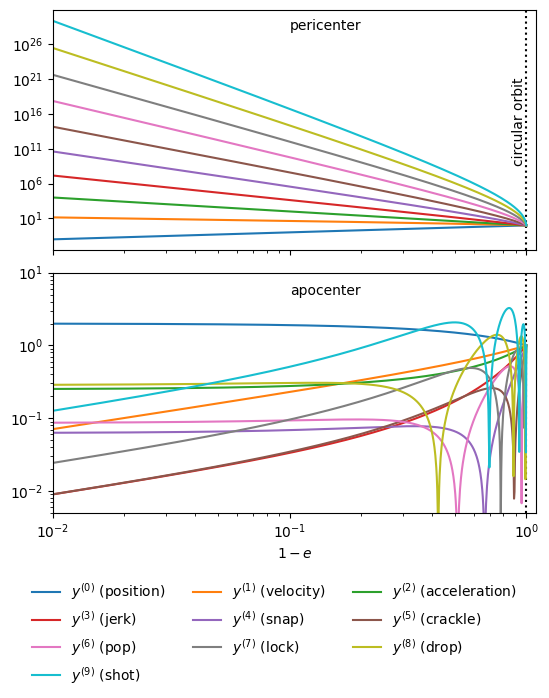

In [5]:
fig, ax = plt.subplots(2,1,figsize=(5.6,7), sharex=True)
ax[0].text(0.1, 1e28, "pericenter")
ax[1].text(0.1, 5, "apocenter")
for _ax in ax:
    _ax.set_xscale("log")
    _ax.set_yscale("log")
ax[1].set_ylim([5e-3,10])
oneminuses = np.logspace(-2,-0.00001,1000)
ax[1].set_xlim([oneminuses[0],1.1])
ax[1].set_xlabel("$1 - e$")

_dxs = dxs(1.-oneminuses,0)
_dys = dys(1.-oneminuses,0)
ax[0].axvline(1,ls=":", color="black")
ax[1].axvline(1,ls=":", color="black")
ax[0].text(1, 1e9, "circular orbit", ha='right', rotation=90)

for i in range(0,10,1):
    ax[0].plot(oneminuses, np.sqrt(_dxs[i]**2+_dys[i]**2), label="$y^{(%d)}$ (%s)"%(i,names[i]))
_dxs = dxs(1.-oneminuses,np.pi)
_dys = dys(1.-oneminuses,np.pi)
for i in range(0,10,1):
    ax[1].plot(oneminuses, np.sqrt(_dxs[i]**2+_dys[i]**2), label="$y^{(%d)}$ (%s)"%(i,names[i]))
    
handles, labels = ax[0].get_legend_handles_labels()    
reorder = lambda l, nc: sum((l[i::nc] for i in range(nc)), [])

fig.tight_layout()
fig.subplots_adjust(bottom=0.26)   
fig.legend(reorder(handles,3), reorder(labels,3), loc='lower center',frameon=False, ncols=3);

fig.savefig("derivatives.png",dpi=500)

# Eccentric orbits

In [6]:
oneminuses = np.concatenate((np.logspace(-2.5,-0.75,100), np.logspace(-0.75,-0.0000,20000)))
es = 1.-oneminuses
_dxs_apo = dxs(1.-oneminuses,np.pi)
_dys_apo = dys(1.-oneminuses,np.pi)
_dxs = dxs(1.-oneminuses,0)
_dys = dys(1.-oneminuses,0)
_epsilon_bar = 1e-9 *5040.0
steps_per_circ_orbit = 2*np.pi/((_epsilon_bar)**(1./7.))

def getnewdts(E):
    _dxs = dxs(1.-oneminuses,E)
    _dys = dys(1.-oneminuses,E)
    r = np.sqrt(np.power((_dxs[4]**2+_dys[4]**2)/(_dxs[2]**2+_dys[2]**2),1./2.) + (_dxs[3]**2+_dys[3]**2)/(_dxs[2]**2+_dys[2]**2))
    return np.sqrt(2)*(_epsilon_bar)**(1./7.)/r

newdts = getnewdts(0)
newdts_apo = getnewdts(np.pi)
steps_per_largee_peri = (2*np.pi*(1-es)**2/np.sqrt(1-es**2))[0]/(newdts)[0]
steps_per_orbit_apo = 1./(newdts_apo[0]/(np.pi*2))


In [7]:
def getF23dts(E):
    _dxs = dxs(es,E)
    _dys = dys(es,E)
    y2 = np.sqrt(_dxs[2]**2+_dys[2]**2)
    y3 = np.sqrt(_dxs[3]**2+_dys[3]**2)
    tau = y2/y3
    return tau
F23dts = getF23dts(0)
F23dts_apo = getF23dts(np.pi)
def getF24dts(E):
    _dxs = dxs(es,E)
    _dys = dys(es,E)
    y2 = np.sqrt(_dxs[2]**2+_dys[2]**2)
    y4 = np.sqrt(_dxs[4]**2+_dys[4]**2)
    tau = np.sqrt(y2/y4)
    return tau
F24dts = getF24dts(0)
F24dts_apo = getF24dts(np.pi)


In [8]:
def getA85dts(E):
    _dxs = dxs(es,E)
    _dys = dys(es,E)
    y2 = np.sqrt(_dxs[2]**2+_dys[2]**2)
    y3 = np.sqrt(_dxs[3]**2+_dys[3]**2)
    y4 = np.sqrt(_dxs[4]**2+_dys[4]**2)
    y5 = np.sqrt(_dxs[5]**2+_dys[5]**2)
    tau = np.sqrt((y2*y4+y3*y3)/(y3*y5+y4*y4))
    return tau
A85dts = getA85dts(0)
A85dts_apo = getA85dts(np.pi)
A85eta = (_epsilon_bar)**(1./7.)

In [9]:
dxs0 = dxs(es,0)
dys0 = dys(es,0)
dxsPi = dxs(es,np.pi)
dysPi = dys(es,np.pi)

In [10]:
def getnewdtsLM(E):
    if E == np.pi:
        _dxs = dxsPi
        _dys = dysPi
    elif E == 0:
        _dxs = dxs0
        _dys = dys0
    y2s = _dxs[2]**2+_dys[2]**2
    y3s = _dxs[3]**2+_dys[3]**2
    y4s = _dxs[4]**2+_dys[4]**2
    y5s = _dxs[5]**2+_dys[5]**2
    r = np.sqrt((y2s)/(y3s+np.sqrt(y2s*y4s)) + (y3s*y3s)/(y3s*y4s+y4s*np.sqrt(y2s*y4s)))
    return np.sqrt(2)*(_epsilon_bar)**(1./7.)*r

newdtsLM = getnewdtsLM(0)
newdtsLM_apo = getnewdtsLM(np.pi)


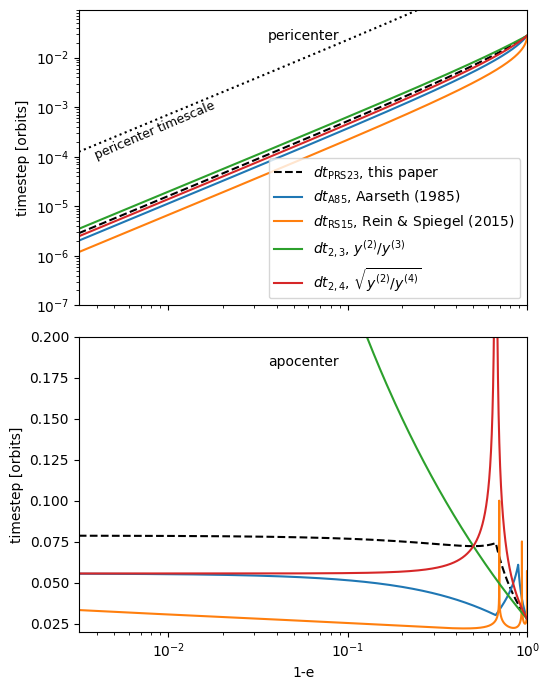

In [13]:
fig, ax = plt.subplots(2,1,figsize=(5.6,7), sharex=True)
ax[0].text(0.5, 0.9, "pericenter",horizontalalignment='center',transform = ax[0].transAxes)
ax[1].text(0.5, 0.9, "apocenter",horizontalalignment='center',transform = ax[1].transAxes)

ax[1].set_xlabel("1-e")
for _ax in ax:
    _ax.set_ylabel("timestep [orbits]")
    _ax.set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_ylim([1e-7,0.091251])
ax[1].set_ylim([0.02,0.2])
ax[0].set_xlim([oneminuses[0],oneminuses[-1]])

ax[0].plot(oneminuses, newdts/(np.pi*2), label=labelnew,color="black",ls="--")
ax[1].plot(oneminuses, newdts_apo/(np.pi*2), color="black",ls="--")

ax[0].plot(oneminuses, A85eta*A85dts/(np.pi*2), label=labelA85,ls="-")
ax[1].plot(oneminuses, A85eta*A85dts_apo/(np.pi*2), ls="-")

ax[0].plot(oneminuses, np.power(np.abs(_epsilon_bar * _dxs[2]/_dys[9]),1./7.)/(np.pi*2), label=labelold, ls="-")
ax[1].plot(oneminuses, np.power(np.abs(_epsilon_bar * np.sqrt((_dxs_apo[2]**2+_dys_apo[2]**2)/(_dxs_apo[9]**2+_dys_apo[9]**2))),1./7.)/(np.pi*2),ls="-")

ax[0].plot(oneminuses, A85eta*F23dts/(np.pi*2), label=labelF23,ls="-")
ax[1].plot(oneminuses, A85eta*F23dts_apo/(np.pi*2),ls="-")

ax[0].plot(oneminuses, A85eta*F24dts/(np.pi*2), label=labelF24,ls="-")
ax[1].plot(oneminuses, A85eta*F24dts_apo/(np.pi*2),ls="-")

#ax[0].plot(oneminuses, newdtsLM/(np.pi*2), label="New LM")
#ax[1].plot(oneminuses, newdtsLM_apo/(np.pi*2))



ax[0].plot(1.-es,(1-es)**2/np.sqrt(1-es**2),color="black",ls=":",zorder=4)
ax[0].text(4e-3,9e-5,"pericenter timescale",rotation=23.2,rotation_mode='anchor',fontsize=9)
ax[0].legend(loc='lower right');

fig.tight_layout()
fig.savefig("timesteps.png",dpi=500)

# Hyperbolic orbits

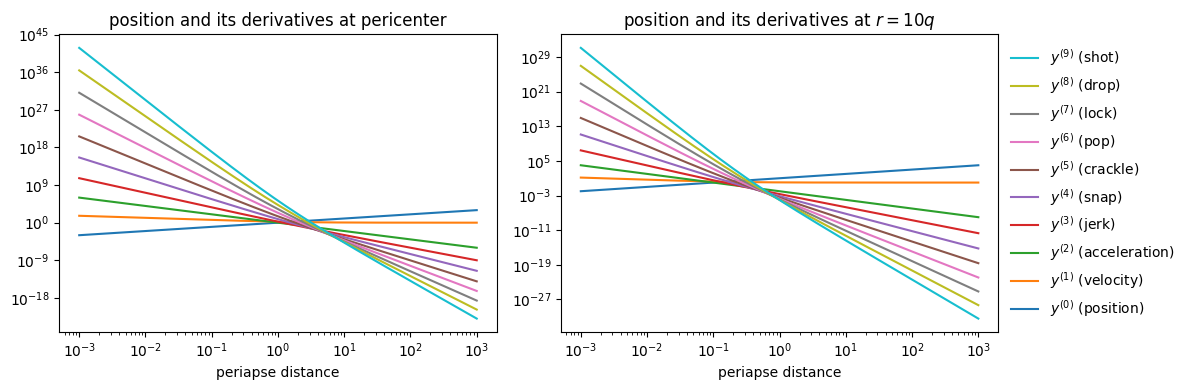

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].set_title("position and its derivatives at pericenter")
ax[1].set_title("position and its derivatives at $r=10q$")
for _ax in ax:
    _ax.set_xlabel("periapse distance")
    _ax.set_xscale("log")
    _ax.set_yscale("log")
#ax[1].set_ylim([5e-3,10])

esm1 = np.logspace(-3,3,1000)
es = esm1+1

_dxs = dxsh(es,0)
_dys = dysh(es,0)
for i in range(0,10,1):
    ax[0].plot(es-1, np.sqrt(_dxs[i]**2+_dys[i]**2), label="$y^{(%d)}$ (%s)"%(i,names[i]))
_dxs = np.zeros((10, len(es)))
_dys = np.zeros((10, len(es)))
for j in range(len(es)):
    r = 10 * (es[j]-1)
    _dxs[:,j] = dxsh(es[j], float(acosh((r+1)/es[j])))
    _dys[:,j] = dysh(es[j], float(acosh((r+1)/es[j])))
for i in range(0,10,1):
    ax[1].plot(es-1, np.sqrt(_dxs[i]**2+_dys[i]**2), label="$y^{(%d)}$ (%s)"%(i,names[i]))
    
handles, labels = ax[0].get_legend_handles_labels()    
ax[1].legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5),frameon=False);
fig.tight_layout()
fig.savefig("derivativeshyper.png",dpi=500)

In [13]:
esm1 = np.logspace(-3,3,1000)
es = esm1+1
_dxs_apo = dxsh(es,np.pi)
_dys_apo = dysh(es,np.pi)
_dxs = dxsh(es,0)
_dys = dysh(es,0)
_epsilon_bar = 1e-9 *5040.0
steps_per_circ_orbit = 2*np.pi/((_epsilon_bar)**(1./7.))

def getnewdts(E):
    _dxs = dxsh(es,E)
    _dys = dysh(es,E)
    r = np.sqrt(np.power((_dxs[4]**2+_dys[4]**2)/(_dxs[2]**2+_dys[2]**2),1./2.) + (_dxs[3]**2+_dys[3]**2)/(_dxs[2]**2+_dys[2]**2))
    return np.sqrt(2)*(_epsilon_bar)**(1./7.)/r

peritimescale =  2*np.pi*(es-1)/np.sqrt((es+1)/(es-1)) # np.sqrt((_dxs[0]**2+_dys[0]**2)/(_dxs[1]**2+_dys[1]**2))


In [14]:
def getA85dts(E):
    _dxs = dxsh(es,E)
    _dys = dysh(es,E)
    y2 = np.sqrt(_dxs[2]**2+_dys[2]**2)
    y3 = np.sqrt(_dxs[3]**2+_dys[3]**2)
    y4 = np.sqrt(_dxs[4]**2+_dys[4]**2)
    y5 = np.sqrt(_dxs[5]**2+_dys[5]**2)
    tau = np.sqrt((y2*y4+y3*y3)/(y3*y5+y4*y4))
    return tau
def getF23dts(E):
    _dxs = dxsh(es,E)
    _dys = dysh(es,E)
    y2 = np.sqrt(_dxs[2]**2+_dys[2]**2)
    y3 = np.sqrt(_dxs[3]**2+_dys[3]**2)
    tau = y2/y3
    return tau
def getF24dts(E):
    _dxs = dxsh(es,E)
    _dys = dysh(es,E)
    y2 = np.sqrt(_dxs[2]**2+_dys[2]**2)
    y4 = np.sqrt(_dxs[4]**2+_dys[4]**2)
    tau = np.sqrt(y2/y4)
    return tau


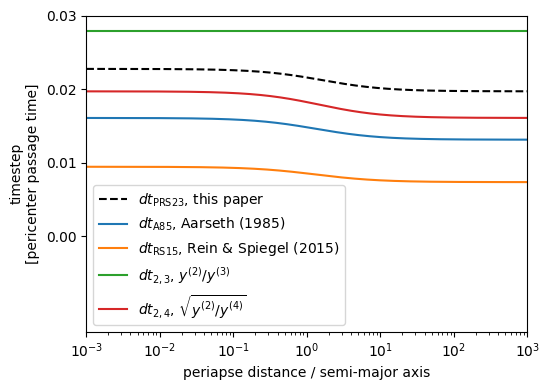

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5.6,4))
ax.set_xlabel("periapse distance / semi-major axis")
ax.set_ylabel("timestep\n[pericenter passage time]")
ax.set_xscale("log")
#ax.set_yscale("log")

ax.plot(es-1, getnewdts(0)/peritimescale, label=labelnew,color="black",ls="--")
ax.plot(es-1, A85eta*getA85dts(0)/peritimescale, label=labelA85,ls="-")
ax.plot(es-1, np.power(np.abs(_epsilon_bar * _dxs[2]/_dys[9]),1./7.)/peritimescale, label=labelold, ls="-")
ax.plot(es-1, A85eta*getF23dts(0)/peritimescale, label=labelF23,ls="-")
ax.plot(es-1, A85eta*getF24dts(0)/peritimescale, label=labelF24,ls="-")

ax.set_ylim([-0.013,0.03])
ax.set_xlim([es[0]-1,es[-1]-1])
ax.set_yticks([0,0.01,0.02,0.03])

#ax.axhline(0.023,label="2.3% pericenter timescale",color="green",ls=":",zorder=4)


ax.legend(loc='lower left');
fig.tight_layout()
fig.savefig("timestepshyper.png",dpi=500)